PROJECT 4: Machine Learnig with Decision Tree Model

HONORE NGUESSAN

December 15, 2019

# Introduction

The dataset, which is from http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets, contains 1309 observation and 14 variables 

about one of the most sad shipwrecks in history that occured on April 15, 1912: Titanic. 

In this project, I'm going to use Machine Learning with Decision Tree Model to predict whether a passenger on the titanic would 

have been survived or not from the profile of the passengers. In addition, I'm also interested in the following questions:

1- How many survive in the dataset?

2- How many survive depending on the gender?


# Importing the Libraries

Here the following libraries we are going to use throughout our Machine Learning with Decision Tree Model prediction:

In [277]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from subprocess import check_output
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing,neighbors,svm
from sklearn import tree
from scipy import misc

# 1- Preparing and wrangling titanic data with Pandas and Numpy

# Reading the Data

The very first step for implementing the machine learning model is collecting the data. We will load the csv file containing the data-set into the programs using the pandas.

In [278]:
# Read the .CVS file
df=pd.read_csv('titanic3.csv')
print(df)

      pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5          1         1                                Anderson, Mr. Harry   
6          1         1                  Andrews, Miss. Kornelia Theodosia   
7          1         0                             Andrews, Mr. Thomas Jr   
8          1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                            Artagaveytia, Mr. Ramon   
10         1         0                             Astor, Col. John Jacob   
11         1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   

The dataset has 1309 observations and 14 variables.

# Looking through the data

In [279]:
# dimensions of the dataframe
df.shape

(1309, 14)

In [280]:
# type of the data
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [281]:
# Look at the top values
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [282]:
# Look at the bottom values
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


The column heading variables have the following meanings: 

Survived: Outcome of survival (0 = No; 1 = Yes)

Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)

Name: Name of passenger

Sex: Sex of the passenger

Age: Age of the passenger (Some entries contain NaN)

SibSp: Number of siblings and spouses of the passenger aboard

Parch: Number of parents and children of the passenger aboard

Ticket: Ticket number of the passenger

Fare: Fare paid by the passenger

Cabin Cabin number of the passenger (Some entries contain NaN)

Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)


In [283]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


 Overall, by looking up the data, there are missing values in features such as age, cabin, boatlife..ect.

# - Cleaning Data

The the target variable is whether or not the passenger survived. The data-set is goind to be modified according to the target variable. We will eliminate all the null values and the colomns we do not need in the DataFrame.

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64
********************


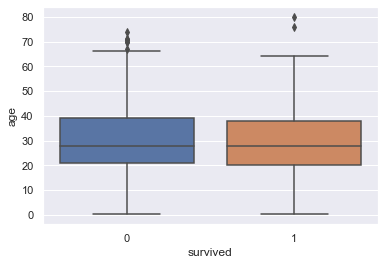

In [284]:
# Summary of the missing values
print (df.isnull().sum())
print (''.center(20, "*"))
sns.boxplot(x='survived',y='age',data=df)

In [285]:
#let's start off by dropping the coulmns we will not be needing
df2 = df.drop(["name","ticket","cabin","boat","body","home.dest","fare"], axis=1)

In [286]:
# Remove Rows With Missing Values
df2.dropna(inplace=True)

In [287]:
df2.head()

,pclass,survived,sex,age,sibsp,parch,embarked
0,1,1,female,29.00,0,0,S
1,1,1,male,0.92,1,2,S
2,1,0,female,2.00,1,2,S
3,1,0,male,30.00,1,2,S
4,1,0,female,25.00,1,2,S


In [288]:
# We can transform Pclass 
# 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
df2['socioeconomicstatus']=df2.pclass.map({1:'upper',2:'middle',3:'lower'})

In [289]:
# We can transform Embarked
# (C = Cherbourg; Q = Queenstown; S = Southampton)
df2['embarkedport']=df2.embarked.map({'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})

In [290]:
# Dropping the used columns
df2.drop(['pclass','embarked'],axis=1,inplace=True)

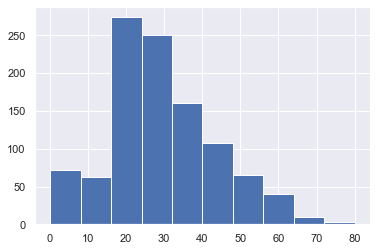

In [291]:
# Group age for comparisons
df2.age.hist()

In [292]:
# Let us try to separate this into ages
agesplit = [0,10,18,25,40,90]
agestatus = ['Adolescent','Teenager','Young Adult','Adult','Elder']

df2['agegroup']=pd.cut(df2.age,agesplit,labels=agestatus)

In [293]:
# Create a feature where we count both numbers of siblings and parents
df2['familymembers']=df2.sibsp+df2.parch

In [294]:
# Let us try to find whether the passengers are alone or not
hasfamily = (df2.familymembers>0)*1
df2['hasfamily'] = hasfamily

In [295]:
# Dropping the used columns
df2.drop(['sibsp','parch','age'],axis=1,inplace=True)

In [296]:
# Final transformed data
df2.head()

,survived,sex,socioeconomicstatus,embarkedport,agegroup,familymembers,hasfamily
0,1,female,upper,Southampton,Adult,0,0
1,1,male,upper,Southampton,Adolescent,3,1
2,0,female,upper,Southampton,Adolescent,3,1
3,0,male,upper,Southampton,Adult,3,1
4,0,female,upper,Southampton,Young Adult,3,1


In [297]:
# dimensions
df2.shape

(1044, 7)

survived               0
sex                    0
socioeconomicstatus    0
embarkedport           0
agegroup               0
familymembers          0
hasfamily              0
dtype: int64
********************


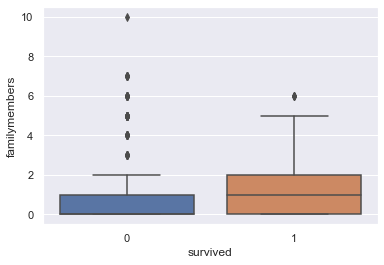

In [298]:
# Summary of the missing values
print (df2.isnull().sum())
print (''.center(20, "*"))
sns.boxplot(x='survived',y='familymembers',data=df2)

Now, that we have no missing data in a dataframe, we can begin an advanced analysis of the data using powerful single-line Pandas functions. 

In [299]:
# First, let’s examine the overall chance of survival for a Titanic passenger
df2['survived'].mean()

0.407088122605364

The calculation shows that only around 41% of the passengers survived.

In [300]:
# chance to survive by class
df2.groupby('socioeconomicstatus').mean()

,survived,familymembers,hasfamily
socioeconomicstatus,,,
lower,0.261477,1.003992,0.361277
middle,0.440613,0.808429,0.455939
upper,0.634752,0.893617,0.553191


The result emphasizes that passengers in first class had a 63% chance of survival, compared to a 26% chance for those in 3rd class.

# Running a chi square analysis

In [301]:
isadult = df2.agegroup=='Adult'
issurvived = df2.survived==1
isnotsurvived = df2.survived==0

all = df2[isadult].groupby(['sex','socioeconomicstatus']).count().survived
survived = df2[isadult&issurvived].groupby(['sex','socioeconomicstatus']).count().survived
notsurvived = df2[isadult&isnotsurvived].groupby(['sex','socioeconomicstatus']).count().survived

In [302]:
survivedcrosstab = pd.crosstab(index=df2.survived, columns = df2.socioeconomicstatus,margins=True)
survivedcrosstab.columns = ['lower','middle','upper','total']
survivedcrosstab.index = ['non survied','survived','total']

In [303]:
survivedcrosstab

,lower,middle,upper,total
non survied,370,146,103,619
survived,131,115,179,425
total,501,261,282,1044


In [304]:
survivedcrosstab/survivedcrosstab.ix['total','total']

C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,lower,middle,upper,total
non survied,0.354406,0.139847,0.098659,0.592912
survived,0.125479,0.110153,0.171456,0.407088
total,0.479885,0.250000,0.270115,1.000000


In [305]:
from scipy import stats

chi2_stat, p_val, dof, ex = stats.chi2_contingency(survivedcrosstab)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
105.78109620861316


===Degrees of Freedom===
6


===P-Value===
1.5562219408293647e-20


===Contingency Table===
[[ 297.04885057  154.75        167.20114943  619.        ]
 [ 203.95114943  106.25        114.79885057  425.        ]
 [ 501.          261.          282.         1044.        ]]


P-value < 0.05, so we reject the null hypothesis, there is a a strong evidence between the passengers on the titanic to survive and the class where they were seating.  

In [306]:
class_sex_grouping = df2.groupby(['socioeconomicstatus','sex']).mean()
class_sex_grouping

survived  familymembers  hasfamily
socioeconomicstatus sex                                       
lower               female  0.473684       1.532895   0.578947
                    male    0.169054       0.773639   0.266476
middle              female  0.893204       1.184466   0.621359
                    male    0.145570       0.563291   0.348101
upper               female  0.961832       1.076336   0.648855
                    male    0.350993       0.735099   0.470199

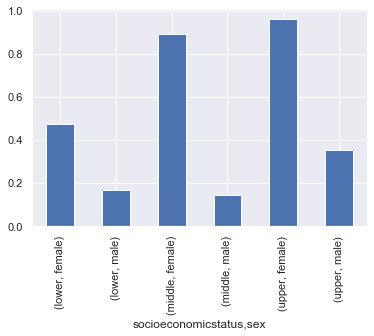

In [307]:
class_sex_grouping['survived'].plot.bar()

In [308]:
# how many survive?
# Let's now group the data to find if most of them are male or female
df2.groupby(['survived','sex']).count()

socioeconomicstatus  embarkedport  agegroup  familymembers  \
survived sex                                                                  
0        female                   96            96        96             96   
         male                    523           523       523            523   
1        female                  290           290       290            290   
         male                    135           135       135            135   

                 hasfamily  
survived sex                
0        female         96  
         male          523  
1        female        290  
         male          135

According to the result, female presents more chance chance to survive regardless of any class of the passenger. 

# 2- Using EDA principles and the Matplotlib / Seaborn packages to visualize the data 

The data-set is analyzed to determine the relationship between the variables. By creating different plots to check the relationship between the variables.We are going to use EDA principles and the Matplotlib / Seaborn packages to visualize the data. 

C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


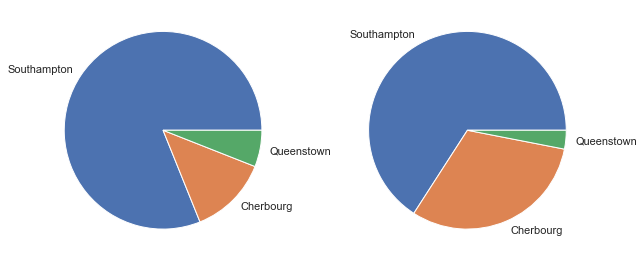

In [309]:
# create a figure with two subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

notsurvivors = df2[df2.survived==0].embarkedport.value_counts()
survivors= df2[df.survived==1].embarkedport.value_counts()


# plot each pie chart in a separate subplot
ax1.pie(notsurvivors,labels=notsurvivors.index);
ax2.pie(survivors,labels=survivors.index);

([<matplotlib.axis.XTick at 0x1f20d2e73c8>,
 <a list of 2 Text xticklabel objects>)

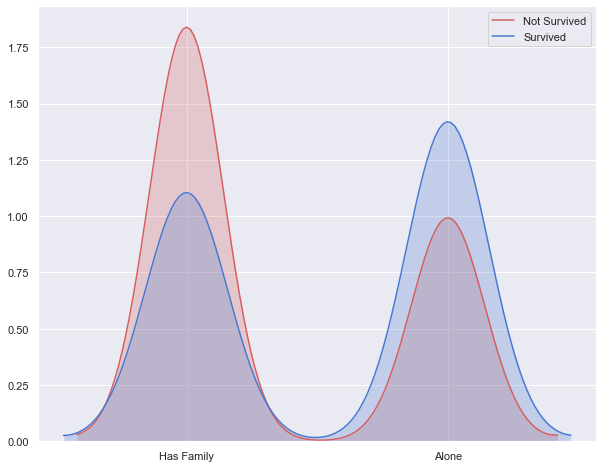

In [310]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df2.loc[(df2['survived'] == 0),'hasfamily'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(df2.loc[(df2['survived'] == 1),'hasfamily'],shade=True,color='b',label='Survived' )

labels = ['Has Family', 'Alone']
plt.xticks(sorted(df2.hasfamily.unique()),labels)

Text(0.5, 0, 'familymembers')

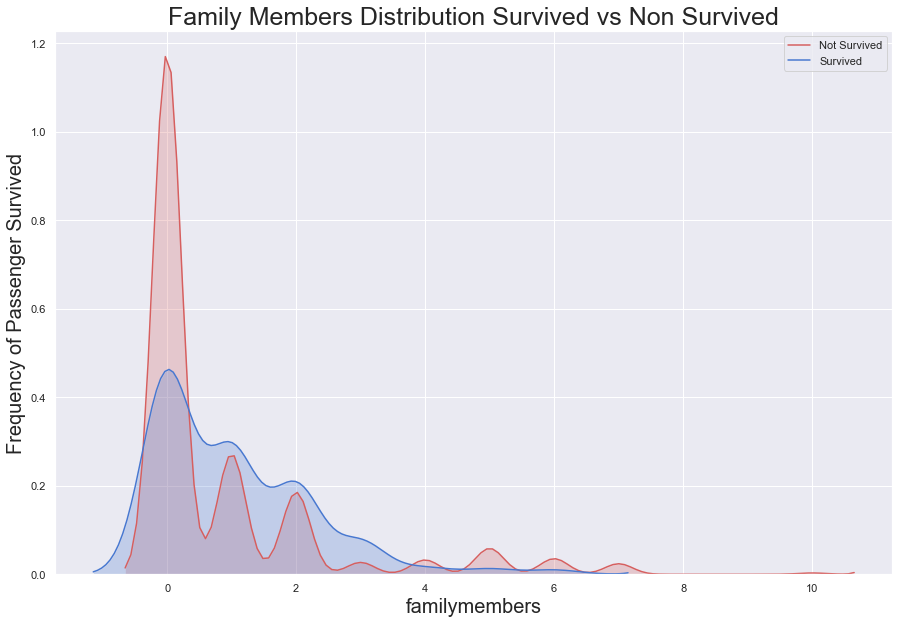

In [311]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(df2.loc[(df2['survived'] == 0),'familymembers'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(df2.loc[(df2['survived'] == 1),'familymembers'],color='b',shade=True,label='Survived' )
plt.title('Family Members Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('familymembers',fontsize=20)

# 3- Using scikit-learn DecisionTree  Classification 

A this step, for the performance of the model the data, we are going to split it into the test data and train data. The data is split using the train_test_split. The data here is split in the ratio 70:30.

In [312]:
# all features in X and the target variable in Y
X = df2.drop("survived",axis=1)
y = df2["survived"]

In [313]:
# Clean up x by getting the dummies
X=pd.get_dummies(X)

In [314]:
import numpy as np
from sklearn import preprocessing,neighbors,svm
from sklearn.model_selection import train_test_split

#splitting the train and test sets
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2)

In [315]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=3)
clftree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 4 - Ploting the tree with tree.plot_tree 

[Text(167.4, 190.26, 'X[3] <= 0.5\nentropy = 0.487\nsamples = 835\nvalue = [486, 349]'),
 Text(83.7, 135.9, 'X[4] <= 0.5\nentropy = 0.355\nsamples = 317\nvalue = [73, 244]'),
 Text(41.85, 81.53999999999999, 'X[6] <= 0.5\nentropy = 0.139\nsamples = 200\nvalue = [15, 185]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.201\nsamples = 88\nvalue = [10, 78]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.085\nsamples = 112\nvalue = [5, 107]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 3.5\nentropy = 0.5\nsamples = 117\nvalue = [58, 59]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.49\nsamples = 98\nvalue = [42, 56]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(251.10000000000002, 135.9, 'X[10] <= 0.5\nentropy = 0.323\nsamples = 518\nvalue = [413, 105]'),
 Text(209.25, 81.53999999999999, 'X[6] <= 0.5\nentropy = 0.286\nsamples = 481\nvalue = [398, 83]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0

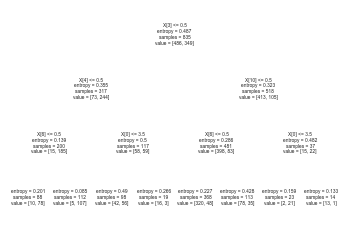

In [316]:
# Ploting the tree with tree.plot_tree after the training
tree.plot_tree(clftree.fit(X_train,y_train))

In [317]:
# Visualizing the decision tree
from sklearn import tree
from scipy import misc
import pydotplus
import graphviz

def show_tree(decisionTree, file_path):
    tree.export_graphviz(decisionTree, out_file='tree.dot',feature_names=X_train.columns)
    graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
    graph.write_png('tree.png')
    i = misc.imread(file_path)
    
    fig, ax = plt.subplots(figsize=(18, 10))    
    ax.imshow(i, aspect='auto')

# To use it
show_tree(clftree, 'tree.png')

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
pip install graphiz

In [318]:
import os
os.path

<module 'ntpath' from 'C:\\Users\\BETTY KOUADIO\\Anaconda3\\lib\\ntpath.py'>

In [319]:
cd("C:/Users/BETTY KOUADIO/Anaconda3")

[WinError 123] The filename, directory name, or volume label syntax is incorrect: '("C:/Users/BETTY KOUADIO/Anaconda3)'
C:\Users\BETTY KOUADIO


In [320]:
pip install 

Note: you may need to restart the kernel to use updated packages.


'C:\Users\BETTY' is not recognized as an internal or external command,
operable program or batch file.


In [321]:
conda install graphiz


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\BETTY



# Use appropriate metric and interpret the meaning of the score.

In [322]:
predictions = clftree.predict(X_test)

In [323]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       133
           1       0.71      0.64      0.68        76

    accuracy                           0.78       209
   macro avg       0.76      0.75      0.75       209
weighted avg       0.77      0.78      0.77       209



In [324]:
# Use appropriate metric and interpret the meaning of the score by susing Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[113,  20],
       [ 27,  49]], dtype=int64)

Confusion matrix is a table which describes the performance of a prediction model. 

Prediction: 159 positive and get positive result: 106 === true positive

Prediction: 93 negative and get negative result: 63 === True negative:

Prediction: 19 positive and get negative result:  25  ===False positive

Prediction: 42 negative and get positive result: 15 ===False negative

Text(0.5, 257.44, 'Predicted label')

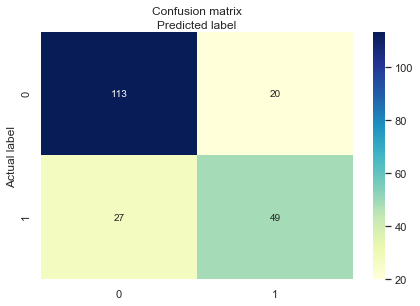

In [325]:
# Visualizing the Confusion Matrix 

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [326]:
# Accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.7751196172248804
Precision: 0.7101449275362319
Recall: 0.6447368421052632


# 5. Interpreting the result of the Decision Tree Classification Model

Accuracy score is the percentage of accuracy of the predictions made by the model. For our model the accuracy score is 81%, which is considerably high accurate. This score is better for our predictive model.

# 6. Predict the classes of the test data. Predict the class probability of the test data

# Predict with Decision Tree

In [327]:
# Finding the accuracy of decision tree

from sklearn.metrics import accuracy_score, log_loss

print('****Results****')
train_predictions = clftree.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

****Results****
Accuracy: 77.5120%


# Model Comparison and Prediction

In [329]:
clftree = tree.DecisionTreeClassifier(max_depth=3)

In [330]:
clftree.fit(X_train,y_train)
clftree.score (X_test, y_test)

0.7751196172248804

The resulting reading, 0.8086, means that the model correctly predicted the survival of 81% of the test set. Not bad for our first model!

In [257]:

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 78.4689%
Log Loss: 4.181323480276209
SVC
****Results****
Accuracy: 57.8947%
Log Loss: 0.4572965057313494
DecisionTreeClassifier
****Results****
Accuracy: 77.5120%
Log Loss: 2.4855145907255145


C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 77.0335%
Log Loss: 1.5769865013687947
AdaBoostClassifier
****Results****
Accuracy: 80.8612%
Log Loss: 0.6797441165019071
GradientBoostingClassifier
****Results****
Accuracy: 78.9474%
Log Loss: 0.4411102755330877
GaussianNB
****Results****
Accuracy: 81.3397%
Log Loss: 0.7040938661671466
LinearDiscriminantAnalysis
****Results****
Accuracy: 79.9043%
Log Loss: 0.44920599709189185
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 57.4163%
Log Loss: 8.267642637754328


C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


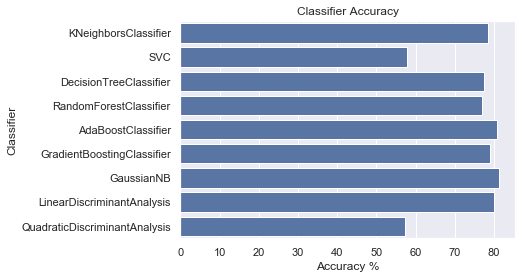

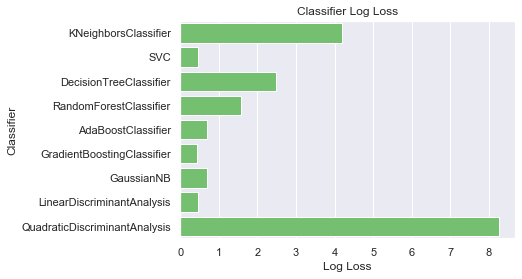

In [258]:
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

# Conclusion:

- Gender plays a very important roles, female has the most likelihood of surviving.
- The higher Socioeconomic status, the more likelihood of surviving (especially for female)